# **Part 1: Anscombe's quartet**

## **Step 1: Setup in Google Colab**
Open Google Colab.
Ensure the dataset /content/sample_data/anscombe.json is available (default in Colab).

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import json #sometimes, we need extra libraries to explore our data, in this case the json library is required

## **Step 2: Loading the Dataset**

Load the dataset:

In [13]:
# Load the JSON dataset
file_path = "Resources/anscombe.json"
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert JSON data into a DataFrame, very straight forward
df = pd.DataFrame(data)

df.head(50)

,Series,X,Y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.81


## **Step 3: Understanding the Dataset**

The Anscombe dataset consists of multiple datasets (I, II, III, IV) with two variables, x and y, demonstrating how similar statistical properties can represent very different distributions. We saw it in class.

In [14]:
# Unique datasets in the 'dataset' column
print("Unique datasets:")
print(df['Series'].unique())

Unique datasets:
['I' 'II' 'III' 'IV']


In [15]:
# Calculate summary statistics grouped by dataset
summary = df.groupby('Series').agg({
    'X': ['mean', 'std'],
    'Y': ['mean', 'std']
})
print("Summary statistics:")
print(summary)

Summary statistics:
          X                   Y          
       mean       std      mean       std
Series                                   
I       9.0  3.316625  7.500000  2.032890
II      9.0  3.316625  7.500909  2.031657
III     9.0  3.316625  7.500000  2.030424
IV      9.0  3.316625  7.500909  2.030579


In [16]:
# Access the 'x' and 'y' columns
x_values = df['X']
y_values = df['Y']

print("x values:\n", x_values)
print("\ny values:\n", y_values)

# Accessing multiple columns
xy_values = df[['X', 'Y']]
print("\nx and y values:\n", xy_values)

x values:
 0     10.0
1      8.0
2     13.0
3      9.0
4     11.0
5     14.0
6      6.0
7      4.0
8     12.0
9      7.0
10     5.0
11    10.0
12     8.0
13    13.0
14     9.0
15    11.0
16    14.0
17     6.0
18     4.0
19    12.0
20     7.0
21     5.0
22    10.0
23     8.0
24    13.0
25     9.0
26    11.0
27    14.0
28     6.0
29     4.0
30    12.0
31     7.0
32     5.0
33     8.0
34     8.0
35     8.0
36     8.0
37     8.0
38     8.0
39     8.0
40    19.0
41     8.0
42     8.0
43     8.0
Name: X, dtype: float64

y values:
 0      8.04
1      6.95
2      7.58
3      8.81
4      8.33
5      9.96
6      7.24
7      4.26
8     10.84
9      4.81
10     5.68
11     9.14
12     8.14
13     8.74
14     8.77
15     9.26
16     8.10
17     6.13
18     3.10
19     9.13
20     7.26
21     4.74
22     7.46
23     6.77
24    12.74
25     7.11
26     7.81
27     8.84
28     6.08
29     5.39
30     8.15
31     6.42
32     5.73
33     6.58
34     5.76
35     7.71
36     8.84
37     8.47
38     7.04
3

In [17]:
from re import I
# Pull a single series from the dataset
# Filter rows where the 'Series' column is equal to 'I'
I_values = df[df['Series'] == 'I']
I_values
II_values = df[df['Series'] == 'II']
II_values
III_values = df[df['Series'] == 'III']
III_values
IV_values = df[df['Series'] == 'IV']
IV_values



,Series,X,Y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


## **Step4: Visualizing the data**

Task 1: Scatterplots

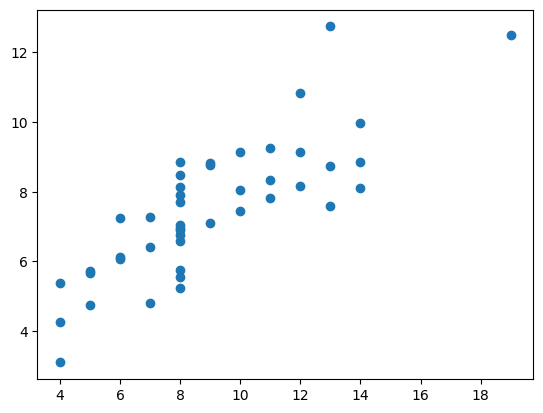

In [18]:
plt.scatter(df['X'], df['Y'])

Do the scatter plots look similar or different across datasets?

How does this align with the summary statistics?

Task 2: Combine All Datasets in One Plot

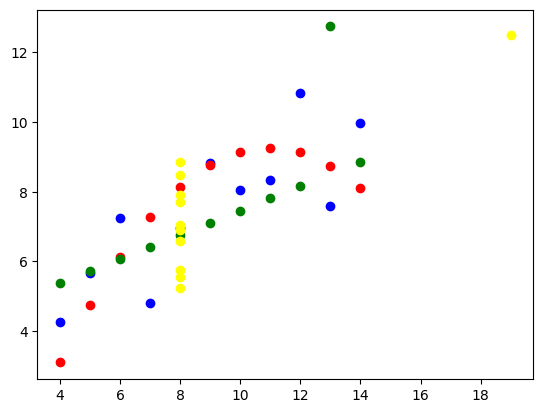

In [19]:
plt.scatter(I_values['X'], I_values['Y'], color='blue')
plt.scatter(II_values['X'], II_values['Y'], color='red')
plt.scatter(III_values['X'], III_values['Y'], color='green')
plt.scatter(IV_values['X'], IV_values['Y'], color='yellow')

# **Part 2: New dataset, new tasks**

**Step1:** Load the california housing test data from colab (available by default).

In [20]:
df2 = pd.read_csv("Resources/california_housing_test.csv")

In [21]:
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Based on this sample, what does this dataset represent?

**Step 2:** Visualize this data (Your choice of visualization).

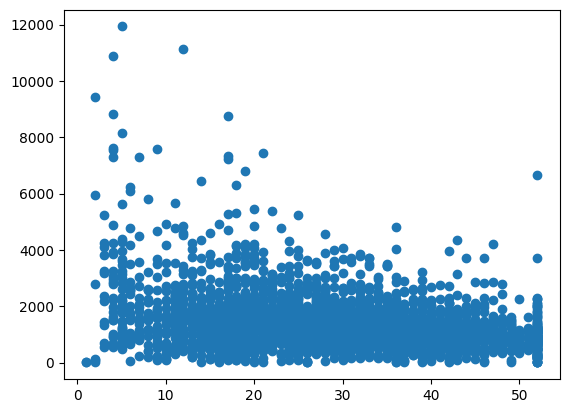

In [22]:
plt.scatter(df2['housing_median_age'], df2['population'])
plt.show()

**Step 2:** Can you create any bar plots with this data? If so, how?

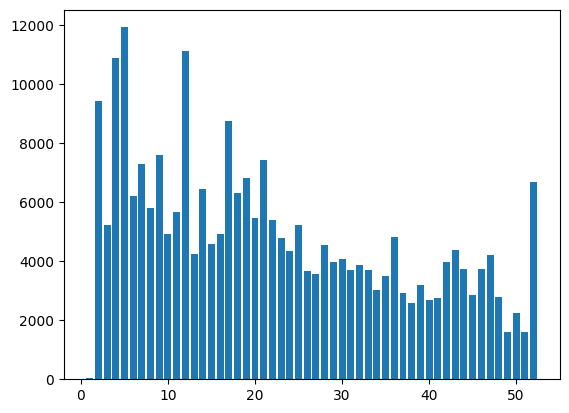

In [23]:
plt.bar(df2['housing_median_age'], df2['population'])
plt.show()